Scikit Learn Official Documentation ===>  https://scikit-learn.org/stable/modules/tree.html

FOR GUIDENCE GO TO https://gdcoder.com/decision-tree-regressor-explained-in-depth/

# Decision Tree
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

## Advantages

1. Simple to understand and to interpret. Trees can be visualised.
2. Requires little data preparation but this module does not support missing values.
3. Handle both numerical and categorical data.
4. Handle multi-output problem.
5. Explanation for the condition is easily explained by boolean logic.
6. Performs well even if its assumptions are somewhat violated.

## Disadvantages

1. create over-complex trees that do not generalise the data well called overfitting.
2. Decision trees can be unstable because small variations in the data might result in a completely different tree.
3. Decision tree learners create biased trees if some classes dominate.



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
%matplotlib inline

## IMPORTING ALL THE IMPORTANT LIBRARIES

In [2]:
df=pd.read_csv('decision_tree_dataset.csv')  ## reading the dataset

In [3]:
df.head()  ## displaying top 5 observations

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.columns=df.columns.str.lower().str.replace(' ','_')#converting column names to lower letter and replacin spaces to underscore

In [5]:
df.set_index('id',inplace=True) # set index id columns

In [6]:
pd.options.display.max_columns=100  # increasing the size of displaying columns 
pd.options.display.max_rows=100   # increasing the size of displaying rows 
df.isna().mean().sort_values(ascending=False).head(10) # percentage of missing values 

poolqc          0.995205
miscfeature     0.963014
alley           0.937671
fence           0.807534
fireplacequ     0.472603
lotfrontage     0.177397
garagetype      0.055479
garagecond      0.055479
garagefinish    0.055479
garagequal      0.055479
dtype: float64

In [7]:
columns=['poolqc','miscfeature','alley','fence','fireplacequ']## these are the columns which have more then 45% missing values

In [8]:
df.drop(columns=columns,inplace=True) # now droping above columns

<AxesSubplot:xlabel='lotfrontage', ylabel='saleprice'>

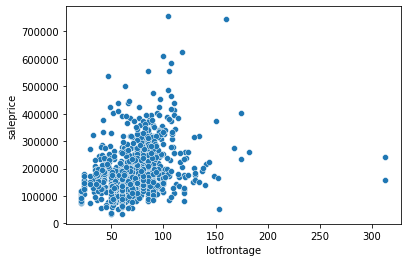

In [9]:
sns.scatterplot(x=df.lotfrontage,y=df.saleprice) ## lot front age is important so we fill na values 

In [10]:
df=df.drop(df[(df.lotfrontage >=300) & (df.saleprice <= 700000)].index,axis=0)   ## droping the outliers

<AxesSubplot:xlabel='lotfrontage', ylabel='saleprice'>

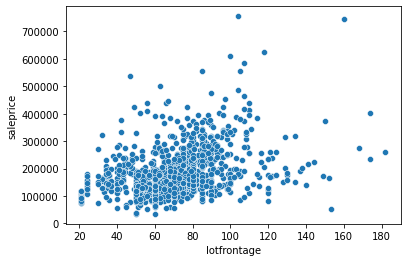

In [11]:
sns.scatterplot(x=df.lotfrontage,y=df.saleprice) ## after removing the outliers

In [12]:
df.shape  ## now total observation we have

(1458, 75)

In [13]:
df.select_dtypes(exclude=np.number).nunique().head() ## look at categorical columns

mszoning       5
street         2
lotshape       4
landcontour    4
utilities      2
dtype: int64

In [14]:
years_columns=df.columns[df.columns.str.contains('year|yr', regex=True)] ## finding the year columns

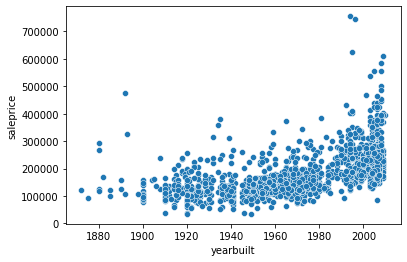

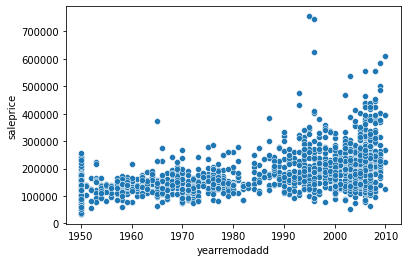

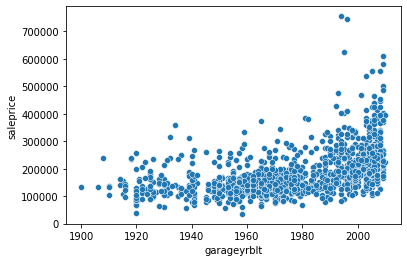

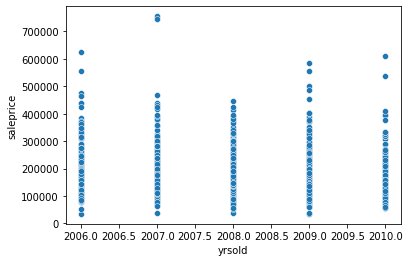

In [15]:
for i in df.loc[:,years_columns].columns:  ## scatter plot with respect to all years column
    plt.figure()
    sns.scatterplot(x=df[i],y=df.saleprice)

In [16]:
df['days']=pd.to_datetime(df.yrsold,format='%Y') - pd.to_datetime(df.yearbuilt,format='%Y')

In [17]:
df['days']=df.days.dt.days   ## how many days the house is old

In [18]:
df.drop(columns=years_columns,inplace=True)  ## droping all year columns 

In [19]:
df.lotfrontage=df.lotfrontage.fillna(df.lotfrontage.median()) ## filling lotfrontage na values by median

In [20]:
df.isna().mean().sort_values().tail(10) ## most na value percentage is 5%

masvnrarea      0.005487
bsmtqual        0.025377
bsmtcond        0.025377
bsmtfintype1    0.025377
bsmtexposure    0.026063
bsmtfintype2    0.026063
garagequal      0.055556
garagecond      0.055556
garagefinish    0.055556
garagetype      0.055556
dtype: float64

In [21]:
df=df.dropna() ## droping all na observations

In [22]:
df.shape

(1336, 72)

In [23]:
train_and_test=pd.get_dummies(df,drop_first=True) ## handling categorical features

In [24]:
y=train_and_test.saleprice                   ## splittting int X and y
X=train_and_test.drop('saleprice',axis=1)

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=23) ## splitting into train and test 

In [26]:
regressor = DecisionTreeRegressor(max_features= 184, min_samples_leaf= 7,criterion= 'mse', max_depth= 7) ## decision tree regressor

In [27]:
regressor.fit(X_train,y_train) ## fitting data into this model

DecisionTreeRegressor(max_depth=7, max_features=184, min_samples_leaf=7)

In [28]:
y_pred=regressor.predict(X_test) ## prediction

In [29]:
r2_score(y_test,y_pred) ## how much variance is covered by model

0.7488600931493201

[Text(729.0135542168675, 509.625, 'X[3] <= 7.5\nmse = 6178908594.675\nsamples = 935\nvalue = 186765.704'),
 Text(463.03915662650604, 441.675, 'X[3] <= 6.5\nmse = 2374109361.474\nsamples = 775\nvalue = 162885.546'),
 Text(257.15060240963857, 373.725, 'X[13] <= 1393.0\nmse = 1271503871.975\nsamples = 562\nvalue = 144697.527'),
 Text(117.65060240963855, 305.775, 'X[10] <= 969.5\nmse = 669872223.241\nsamples = 352\nvalue = 130156.443'),
 Text(40.33734939759036, 237.825, 'X[13] <= 766.0\nmse = 511607059.975\nsamples = 178\nvalue = 116972.747'),
 Text(26.89156626506024, 169.875, 'mse = 460474784.38\nsamples = 11\nvalue = 83678.273'),
 Text(53.78313253012048, 169.875, 'X[32] <= 12236.0\nmse = 437149168.186\nsamples = 167\nvalue = 119165.796'),
 Text(26.89156626506024, 101.92500000000001, 'X[5] <= 38.0\nmse = 219056575.319\nsamples = 35\nvalue = 137558.371'),
 Text(13.44578313253012, 33.97500000000002, 'mse = 153286251.24\nsamples = 22\nvalue = 131311.818'),
 Text(40.33734939759036, 33.9750000

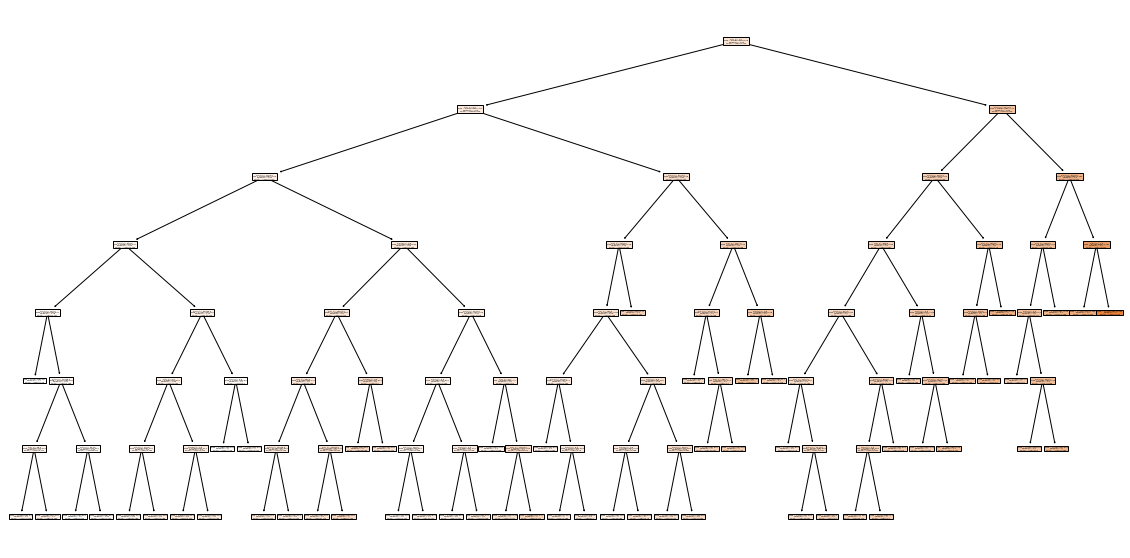

In [38]:
from sklearn import tree ## plotting the tree
plt.figure(figsize=(20,10))
tree.plot_tree(regressor,filled=True)

##  hyperparameter tunning

In [31]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV


# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3,5,7,9, None],
              "max_features": randint(1, 224),
              "min_samples_leaf": randint(1, 9),
              "criterion": ['mse','friedman_mse', 'mae']}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeRegressor()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))
print()

Tuned Decision Tree Parameters: {'criterion': 'mae', 'max_depth': 5, 'max_features': 152, 'min_samples_leaf': 8}
Best score is 0.7123733241746983



##  Prunning

In [32]:
path = regressor.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [33]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 3 with ccp_alpha: 2762206286.8400774


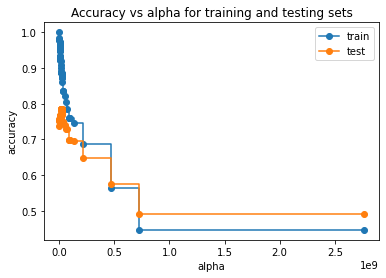

In [34]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [35]:
## model is not getting overfit so leave the prunning